In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
import os

# Lists of old and new folder names
old_folder_names = ["01_palm","02_l", "03_fist","04_fist_moved","05_thumb","06_index","07_ok","08_palm_moved","09_c","10_down"]
new_folder_names = ["sfiha", "pelele","fist","fist_moved","thumb","index","ok","palm_moved","c","down"]

# Make sure both lists have the same length
if len(old_folder_names) != len(new_folder_names):
    raise ValueError("The lists of old and new folder names must have the same length")

# Base directory where the folders are located
base_directory = r"E:\datatask4\09"

# Iterate through the lists and rename folders
for old_name, new_name in zip(old_folder_names, new_folder_names):
    old_path = os.path.join(base_directory, old_name)
    new_path = os.path.join(base_directory, new_name)
    
    # Rename the folder
    try:
        os.rename(old_path, new_path)
        print(f"Renamed '{old_name}' to '{new_name}'")
    except FileNotFoundError:
        print(f"Folder '{old_name}' not found")
    except PermissionError:
        print(f"Permission denied while renaming '{old_name}'")
    except Exception as e:
        print(f"An error occurred while renaming '{old_name}': {e}")


Renamed '01_palm' to 'sfiha'
Renamed '02_l' to 'pelele'
Renamed '03_fist' to 'fist'
Renamed '04_fist_moved' to 'fist_moved'
Renamed '05_thumb' to 'thumb'
Renamed '06_index' to 'index'
Renamed '07_ok' to 'ok'
Renamed '08_palm_moved' to 'palm_moved'
Renamed '09_c' to 'c'
Renamed '10_down' to 'down'


In [2]:
# Define the main directories and subdirectories
main_folders = [f"{i:02d}" for i in range(10)]
sub_folders = ["sfiha", "pelele", "fist", "fist_moved", "thumb", "index", "ok", "c", "down"]

# Initialize the categorized_paths dictionary
categorized_paths = {sub_folder: [] for sub_folder in sub_folders}

# Base directory containing the main folders
base_dir = r"E:\datatask4"  # Replace with the actual path

# Loop through each main folder
for main_folder in main_folders:
    main_folder_path = os.path.join(base_dir, main_folder)
    
    # Loop through each subfolder in the main folder
    for sub_folder in sub_folders:
        sub_folder_path = os.path.join(main_folder_path, sub_folder)
        
        # Ensure the subfolder exists
        if os.path.exists(sub_folder_path):
            # Loop through each file in the subfolder
            for filename in os.listdir(sub_folder_path):
                # Construct the full path to the file
                file_path = os.path.join(sub_folder_path, filename)
                
                # Add the file path to the corresponding category in the dictionary
                categorized_paths[sub_folder].append(file_path)

# Print the categorized paths dictionary to verify
for category, paths in categorized_paths.items():
    print(f"Category: {category}, Number of images: {len(paths)}")


Category: sfiha, Number of images: 2000
Category: pelele, Number of images: 2000
Category: fist, Number of images: 2000
Category: fist_moved, Number of images: 2000
Category: thumb, Number of images: 2000
Category: index, Number of images: 2000
Category: ok, Number of images: 2000
Category: c, Number of images: 2000
Category: down, Number of images: 2000


In [3]:
categorized_paths["sfiha"][213]

'E:\\datatask4\\01\\sfiha\\frame_01_01_0014.png'

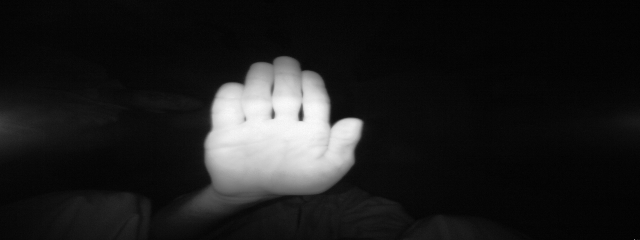

In [4]:
PIL.Image.open(categorized_paths["sfiha"][213])

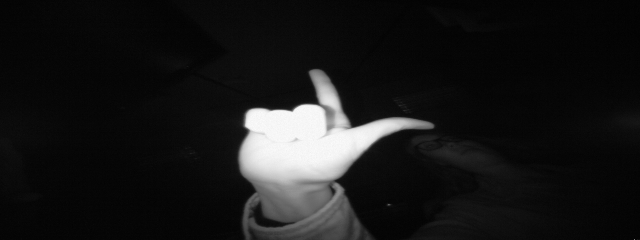

In [5]:
PIL.Image.open(categorized_paths["pelele"][23])

In [6]:
img = cv2.imread(categorized_paths["pelele"][23])
img

array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [ 3,  3,  3],
        [ 5,  5,  5],
        [ 3,  3,  3]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       ...,

       [[ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[ 5,  5,  5],
        [ 7,  7,  7],
        [ 5,  5,  5],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [25, 25, 25],
        [12, 12, 12],
        [16, 16, 16]]], dtype=uint8)

In [7]:
img.shape

(240, 640, 3)

In [8]:
img_resized=cv2.resize(img,(160,160))

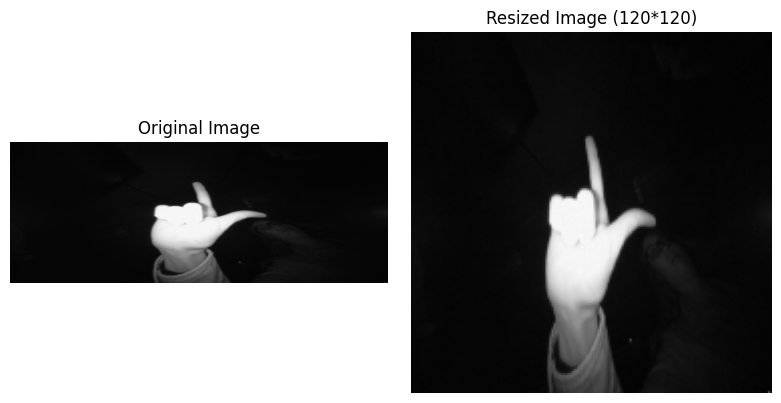

In [9]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Resized Image (160*160)')
plt.imshow(img_resized)
plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
img_labels_dict = {
    "sfiha":0,"pelele":1,"fist":2,"fist_moved":3, "thumb":4, "index":5, "ok":6, "c":7, "down":8}

In [11]:
x=[]
y=[]


for label, images in categorized_paths.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img, (180, 180))
        #normalized_img = resized_img / 255.0
        x.append(resized_img)  
        y.append(img_labels_dict[label]) 

In [12]:
X = np.array(x)
y = np.array(y)

In [13]:
X.shape

(18000, 180, 180, 3)

In [14]:
X[0]

array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 5,  5,  5]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 2,  2,  2]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 6,  6,  6],
        [ 4,  4,  4]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [86, 86, 86],
        [13, 13, 13]]], dtype=uint8)

# modeling

In [15]:
y

array([0, 0, 0, ..., 8, 8, 8])

In [16]:
X.shape

(18000, 180, 180, 3)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [18]:
X_train = X_train / 255
X_test = X_test / 255
X_validation = X_validation /255

MemoryError: Unable to allocate 7.82 GiB for an array with shape (10800, 180, 180, 3) and data type float64

In [ ]:
num_classes = 9  

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=3)


In [ ]:
y_pred_prob = model.predict(X_test)

y_pred = np.argmax(y_pred_prob, axis=1)

# Compare with y_test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on test set: {accuracy}")

# Optionally, you can also evaluate using model.evaluate() method
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


In [ ]:
image_index = 0  # Change this index to test different images
img = X_test[image_index]

# Expand dimensions to create a batch of 1
img_batch = np.expand_dims(img, axis=0)

# Make predictions
pred_probs = model.predict(img_batch)
pred_class = np.argmax(pred_probs, axis=1)[0]
print("the actual is ",y_test[0],"the pridicted is ",pred_class)

In [ ]:
tf.keras.models.save_model(model,'HAND_model.keras')

In [22]:
# Function to load and preprocess a single image

def load_and_preprocess_and_predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (120, 120))  
    img = img / 255.0
    img_batch = np.expand_dims(img, axis=0)
    pred_probs = model.predict(img)
    pred_class = np.argmax(pred_probs, axis=1)[0]
    
    print(f"Predicted label: {pred_class}")


In [4]:
load_and_preprocess_and_predict_image(r"E:\datatask4\01\ok\frame_01_07_0006.png")

NameError: name 'cv2' is not defined

In [ ]:
pred_probs = model.predict(X_test[0])
pred_class = np.argmax(pred_probs, axis=1)
pred_class

In [ ]:
model2=tf.keras.models.load_model(r'C:\Users\USER\HAND_model.keras')

def load_and_preprocess_and_predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (120, 120))  
    img = img / 255.0
    img_batch = np.expand_dims(img, axis=0)
    pred_probs = model.predict(img)
    pred_class = np.argmax(pred_probs, axis=1)[0]
    
    print(f"Predicted label: {class_names[pred_class]}")
    
